### Reinforcement Learning 
#### Thompson Sampling

In [22]:
# ##########################   SCENARIO   ##################################################################
# Since we do not have a real time data feed we are going to read in some simulation data
# In this scenario we are going to pick one of 10 satellites to engage at a given round
# Some of these satellites are capable of detecting ship of interest others are not
# We will know that only once we engage them
# No satellite works all the time
# Our goal is to pick the satellite that has highest probability of working
# We only have past information and up to present to determine which satellite we will pick in the future
# There is no guarantee that the current best pick will provide same results in the future

In [23]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# Importing the dataset
dataset = pd.read_csv('Satellite_Optimization.csv')
Rows,Cols = dataset.shape

In [25]:
dataset.head(4)

,SAT 1,SAT 2,SAT 3,SAT 4,SAT 5,SAT 6,SAT 7,SAT 8,SAT 9,SAT 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0


#### Random Selection

In [26]:
# Randomly Select Satellites
import random
N = Rows
d = Cols
Sat_selected = []
total_reward = 0
for n in range(0, N):
    Sat = random.randrange(d)
    Sat_selected.append(Sat)
    reward = dataset.values[n, Sat]
    total_reward = total_reward + reward

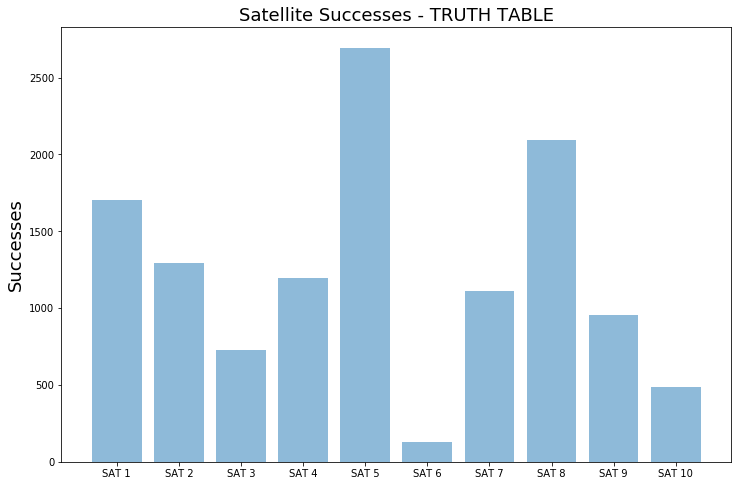

In [27]:
# Truth Values
DVSum = dataset.sum(axis=0)
objects = DVSum.index
y_pos = np.arange(len(objects))
plt.bar(y_pos, DVSum, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Successes', fontsize=18)
plt.title('Satellite Successes - TRUTH TABLE', fontsize=18)
# Control Size
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

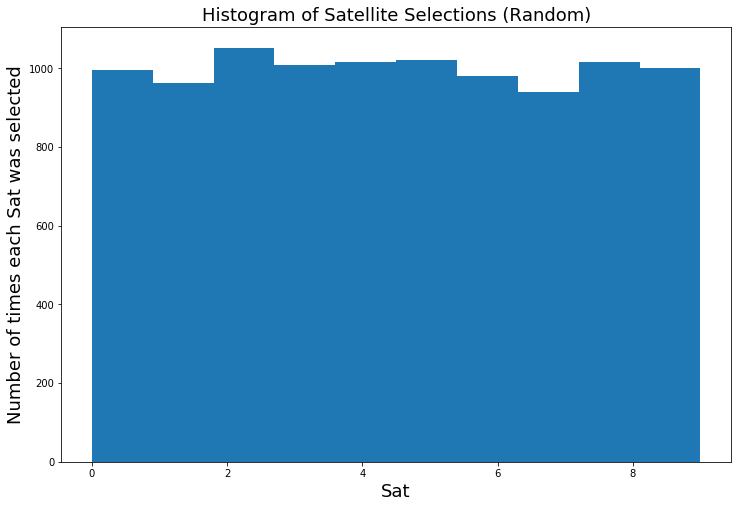

In [28]:
# Plot
plt.hist(Sat_selected)
plt.title('Histogram of Satellite Selections (Random)', fontsize=18)
plt.xlabel('Sat', fontsize=18)
plt.ylabel('Number of times each Sat was selected', fontsize=18)
# Control Size
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

In [29]:
# Implementing Thompson Sampling
import random
N = Rows
d = Cols
Sat_selected = []
numbers_of_rewards_1 = [0] * d
numbers_of_rewards_0 = [0] * d
total_reward = 0
for n in range(0, N):
    Sat = 0
    max_random = 0
    for i in range(0, d):
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        if random_beta > max_random:
            max_random = random_beta
            Sat = i
    Sat_selected.append(Sat)
    reward = dataset.values[n, Sat]
    if reward == 1:
        numbers_of_rewards_1[Sat] = numbers_of_rewards_1[Sat] + 1
    else:
        numbers_of_rewards_0[Sat] = numbers_of_rewards_0[Sat] + 1
    total_reward = total_reward + reward

In [30]:
total_reward

2618

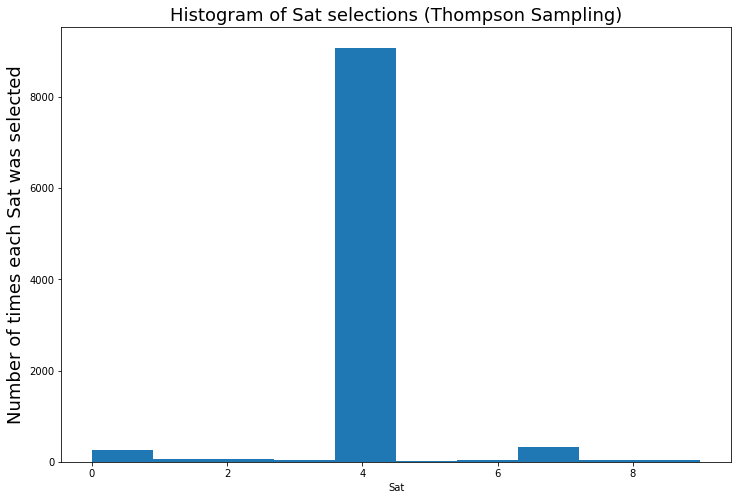

In [31]:
# Plot
plt.hist(Sat_selected)
plt.title('Histogram of Sat selections (Thompson Sampling)', fontsize=18)
plt.xlabel('Sat')
plt.ylabel('Number of times each Sat was selected', fontsize=18)
# Control Size
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

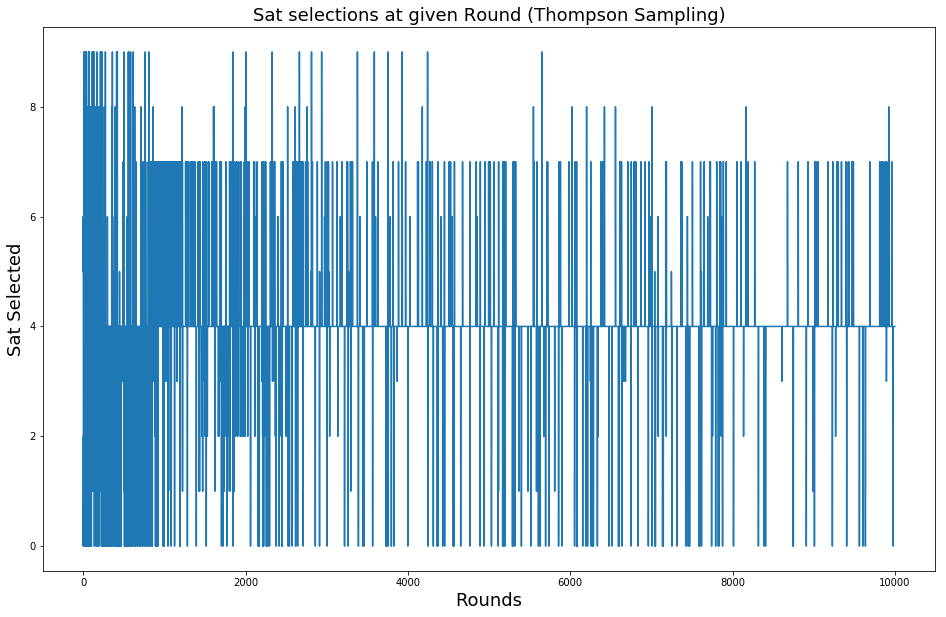

In [32]:
# Time switching [Exploration Vs Exploitation]
plt.plot(Sat_selected)
plt.title('Sat selections at given Round (Thompson Sampling)', fontsize=18)
plt.xlabel('Rounds', fontsize=18)
plt.ylabel('Sat Selected', fontsize=18)
# Control Size
fig = plt.gcf()
fig.set_size_inches(16, 10)
plt.show()